In [1]:
# import
import numpy as np
import pandas as pd
import torch
from creative_project import CreativeProject
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
%matplotlib inline

In [2]:
def sym_update(arr, entry, val):
    """
    updates array 'arr' at positions 'entry'=[i][j] and the mirror [j][i] to the new value 'val'
    """
    xi = entry[0]
    yi = entry[1]
    arr[xi][yi] = val
    arr[yi][xi] = val
    return arr

In [3]:
# === taste multiplication factors ===
# the rank order
# 1 white chocolate + almonds (right amounts)
# 2 dark chocolate + hazelnuts (right amounts)
# 3 dark chocolate + almonds
# 4 white chocolate + hazelnuts

mf_wa = 1.5#1.2  # white chocolate <> almonds
mf_dh = 1.3#1.18  # dark chocolate <> hazelnuts
mf_da = 1.2#1.12  # dark chocolate <> almonds
mf_wh = 0.9#0.95  # white chocolate <> hazelnuts


# === variables ===
# flour, egg, sugar, chocolate_type, chocolate_amount, butter, nut_type, nut_amount
# order of numerical variables
# [flour, egg, sugar, chocolate_amount, butter, nut_amount]

# === setting covariate structure and defining models ===

# DARK CHOCOLATE + HAZELNUTS

# correlations
rho = np.identity(6)  # initialize

rho = sym_update(rho, (0,1), 0.5)  # flour-egg
rho = sym_update(rho, (0,2), 0.3)  # flour-sugar
rho = sym_update(rho, (0,3), 0.3)  # flour-chocolate_amount
rho = sym_update(rho, (0,4), 0.1)  # flour-butter
rho = sym_update(rho, (0,5), 0.1)  # flour-nut_amount

rho = sym_update(rho, (1,2), 0.5)  # egg-sugar
rho = sym_update(rho, (1,3), 0.5)  # egg-chocolate_amount
rho = sym_update(rho, (1,4), 0.1)  # egg-butter
rho = sym_update(rho, (1,5), 0.1)  # egg-nut_amount

rho = sym_update(rho, (2,3), 0.0)  # sugar-chocolate_amount
rho = sym_update(rho, (2,4), 0.5)  # sugar-butter
rho = sym_update(rho, (2,5), 0.0)  # sugar-nut_amount

rho = sym_update(rho, (3,4), 0.5)  # chocolate_amount-butter
rho = sym_update(rho, (3,5), 0.3)  # chocolate_amount-nut_amount

rho = sym_update(rho, (4,5), 0.0)  # butter-nut_amount

# variances
sigv = np.array([[50, 2, 50, 30, 30, 30]])  # standard deviations
var_arr = np.dot(sigv.T, sigv)

# covariances
cv_arr = np.multiply(rho, var_arr)

# mean
# [flour, egg, sugar, chocolate_amount, butter, nut_amount]
mean_arr = np.array([125, 3, 150, 300, 100, 100])

# the model
rv_dh = multivariate_normal(mean_arr,cv_arr)

# model scale for normalization 
rv_dh_norm = rv_dh.pdf(mean_arr)


# DARK CHOCOLATE + ALMONDS

# correlations
rho = np.identity(6)  # initialize

rho = sym_update(rho, (0,1), 0.5)  # flour-egg
rho = sym_update(rho, (0,2), 0.3)  # flour-sugar
rho = sym_update(rho, (0,3), 0.3)  # flour-chocolate_amount
rho = sym_update(rho, (0,4), 0.1)  # flour-butter
rho = sym_update(rho, (0,5), 0.1)  # flour-nut_amount

rho = sym_update(rho, (1,2), 0.5)  # egg-sugar
rho = sym_update(rho, (1,3), 0.3)  # egg-chocolate_amount
rho = sym_update(rho, (1,4), 0.1)  # egg-butter
rho = sym_update(rho, (1,5), 0.1)  # egg-nut_amount

rho = sym_update(rho, (2,3), 0.0)  # sugar-chocolate_amount
rho = sym_update(rho, (2,4), 0.5)  # sugar-butter
rho = sym_update(rho, (2,5), 0.0)  # sugar-nut_amount

rho = sym_update(rho, (3,4), 0.3)  # chocolate_amount-butter
rho = sym_update(rho, (3,5), 0.0)  # chocolate_amount-nut_amount

rho = sym_update(rho, (4,5), 0.0)  # butter-nut_amount

# variances
sigv = np.array([[50, 2, 50, 80, 30, 30]])  # standard deviations
var_arr = np.dot(sigv.T, sigv)

# covariances
cv_arr = np.multiply(rho, var_arr)

# mean
# [flour, egg, sugar, chocolate_amount, butter, nut_amount]
mean_arr = np.array([125, 3, 150, 300, 100, 100])

# the model
rv_da = multivariate_normal(mean_arr,cv_arr)

# model scale for normalization 
rv_da_norm = rv_da.pdf(mean_arr)


# WHITE CHOCOLATE + ALMONDS

# correlations
rho = np.identity(6)  # initialize

rho = sym_update(rho, (0,1), 0.5)  # flour-egg
rho = sym_update(rho, (0,2), 0.3)  # flour-sugar
rho = sym_update(rho, (0,3), 0.2)  # flour-chocolate_amount
rho = sym_update(rho, (0,4), 0.1)  # flour-butter
rho = sym_update(rho, (0,5), 0.1)  # flour-nut_amount

rho = sym_update(rho, (1,2), 0.5)  # egg-sugar
rho = sym_update(rho, (1,3), 0.7)  # egg-chocolate_amount
rho = sym_update(rho, (1,4), 0.3)  # egg-butter
rho = sym_update(rho, (1,5), 0.1)  # egg-nut_amount

rho = sym_update(rho, (2,3), 0.4)  # sugar-chocolate_amount
rho = sym_update(rho, (2,4), 0.5)  # sugar-butter
rho = sym_update(rho, (2,5), 0.0)  # sugar-nut_amount

rho = sym_update(rho, (3,4), 0.3)  # chocolate_amount-butter
rho = sym_update(rho, (3,5), 0.4)  # chocolate_amount-nut_amount

rho = sym_update(rho, (4,5), 0.0)  # butter-nut_amount

# variances
sigv = np.array([[25, 2, 40, 50, 30, 20]])  # standard deviations
var_arr = np.dot(sigv.T, sigv)

# covariances
cv_arr = np.multiply(rho, var_arr)

# mean
# [flour, egg, sugar, chocolate_amount, butter, nut_amount]
mean_arr = np.array([125, 3, 150, 300, 100, 100])

# the model
rv_wa = multivariate_normal(mean_arr,cv_arr)

# model scale for normalization 
rv_wa_norm = rv_wa.pdf(mean_arr)


# WHITE CHOCOLATE + HAZELNUTS

# correlations
rho = np.identity(6)  # initialize

rho = sym_update(rho, (0,1), 0.5)  # flour-egg
rho = sym_update(rho, (0,2), 0.3)  # flour-sugar
rho = sym_update(rho, (0,3), 0.2)  # flour-chocolate_amount
rho = sym_update(rho, (0,4), 0.1)  # flour-butter
rho = sym_update(rho, (0,5), 0.1)  # flour-nut_amount

rho = sym_update(rho, (1,2), 0.5)  # egg-sugar
rho = sym_update(rho, (1,3), 0.7)  # egg-chocolate_amount
rho = sym_update(rho, (1,4), 0.3)  # egg-butter
rho = sym_update(rho, (1,5), 0.1)  # egg-nut_amount

rho = sym_update(rho, (2,3), 0.4)  # sugar-chocolate_amount
rho = sym_update(rho, (2,4), 0.5)  # sugar-butter
rho = sym_update(rho, (2,5), 0.0)  # sugar-nut_amount

rho = sym_update(rho, (3,4), 0.3)  # chocolate_amount-butter
rho = sym_update(rho, (3,5), 0.2)  # chocolate_amount-nut_amount

rho = sym_update(rho, (4,5), 0.4)  # butter-nut_amount

# variances
sigv = np.array([[25, 2, 20, 80, 30, 50]])  # standard deviations
var_arr = np.dot(sigv.T, sigv)

# covariances
cv_arr = np.multiply(rho, var_arr)

# mean
# [flour, egg, sugar, chocolate_amount, butter, nut_amount]
mean_arr = np.array([125, 3, 100, 300, 100, 100])

# the model
rv_wh = multivariate_normal(mean_arr,cv_arr)

# model scale for normalization 
rv_wh_norm = rv_wh.pdf(mean_arr)

In [4]:
def brownie_score(xdf):
    """
    score of the brownie (the objective function).
    :param xdf (pandas df)
    :return score (array or element)
    """
    
    # === get numerical content ===
    nrows = xdf.shape[0]
    
    flour = np.reshape(xdf["flour"].values, (nrows,1))
    egg = np.reshape(xdf["egg"].values, (nrows,1))
    sugar = np.reshape(xdf["sugar"].values, (nrows,1))
    chocolate_amount = np.reshape(xdf["chocolate_amount"].values, (nrows,1))
    butter = np.reshape(xdf["butter"].values, (nrows,1))
    nut_amount = np.reshape(xdf["nut_amount"].values, (nrows,1))
    
    entry = np.hstack((flour, egg, sugar, chocolate_amount, butter, nut_amount))
    
    # === get categorical entries ===
    chocolate_type = xdf["chocolate_type"].values
    nut_type = xdf["nut_type"].values
    
    # combines the categorical inputs
    full_type = list(map('-'.join, zip(chocolate_type, nut_type)))
    
    # === determines score ===
    output = np.zeros((nrows))
    
    for i in range(nrows):
        # picks the right model to use
        if full_type[i] == "dark-almond":
            output[i] = mf_da*rv_da.pdf(entry[i,:]) / rv_da_norm  # normalizing
        elif full_type[i] == "dark-hazelnut":
            output[i] = mf_dh*rv_dh.pdf(entry[i,:]) / rv_dh_norm
        elif full_type[i] == "white-almond":
            output[i] = mf_wa*rv_wa.pdf(entry[i,:]) / rv_wa_norm
        elif full_type[i] == "white-hazelnut":
            output[i] = mf_wh*rv_wh.pdf(entry[i,:]) / rv_wh_norm
            
    return output

Let's take a look at the output of the `brownie_score` function. It is a 1-entry array as expected

In [5]:
# try out the score function
xtmp = pd.DataFrame({"flour": [130], "egg": [3], "sugar": [80], "chocolate_type": ["dark"], "chocolate_amount": [330], "butter": [120], "nut_type": ["almond"], "nut_amount": [75]})

brownie_score(xtmp)

array([0.02663503])

## Solving the problem

The problem will be solved using the `auto`-method. We first define the problem covariate space before setting up the code to solve the problem

In [6]:
# variables: flour, egg, sugar, chocolate_type, chocolate_amount, butter, nut_type, nut_amount

# define covariates
covars_brownie = {
    "flour": {
        "guess": 100,
        "min": 0,
        "max": 200,
        "type": float,
    },
    "egg": {
        "guess": 2,
        "min": 0,
        "max": 5,
        "type": int,
    },
    "sugar": {
        "guess": 100,
        "min": 50,
        "max": 200,
        "type": float,
    },
    "chocolate_type": {
        "guess": "dark",
        "options": {"dark", "white"}, 
        "type": str,
    },
    "chocolate_amount": {
        "guess": 300,
        "min": 150,
        "max": 500,
        "type": float,
    },
    "butter": {
        "guess": 100,
        "min": 0,
        "max": 200,
        "type": float,
    },
    "nut_type": {
        "guess": "almond",
        "options": {"almond", "hazelnut"}, 
        "type": str,
    },
    "nut_amount": {
        "guess": 100,
        "min": 0,
        "max": 200,
        "type": float,
    },
}

# initialize class instance
cc = CreativeProject(covars=covars_brownie)

# number of iterations
max_iter = 200

Solving the problem in closed-loop fashion using the `auto`-method

In [7]:
# run the auto-method
cc.auto(response_samp_func=brownie_score, max_iter=max_iter)

ITERATION 1:
	Identify new covariate datapoint...
	Get response for new datapoint...
	Successfully trained GP model...
	Finish iteration...
ITERATION 2:
	Identify new covariate datapoint...
	Get response for new datapoint...
	Successfully trained GP model...
	Finish iteration...
ITERATION 3:
	Identify new covariate datapoint...
	Get response for new datapoint...
	Successfully trained GP model...
	Finish iteration...
ITERATION 4:
	Identify new covariate datapoint...
	Get response for new datapoint...
	Successfully trained GP model...
	Finish iteration...
ITERATION 5:
	Identify new covariate datapoint...
	Get response for new datapoint...
	Successfully trained GP model...
	Finish iteration...
ITERATION 6:
	Identify new covariate datapoint...
	Get response for new datapoint...
	Successfully trained GP model...
	Finish iteration...
ITERATION 7:
	Identify new covariate datapoint...
	Get response for new datapoint...
	Successfully trained GP model...
	Finish iteration...
ITERATION 8:
	Identi

	Get response for new datapoint...
	Successfully trained GP model...
	Finish iteration...
ITERATION 60:
	Identify new covariate datapoint...
	Get response for new datapoint...
	Successfully trained GP model...
	Finish iteration...
ITERATION 61:
	Identify new covariate datapoint...
	Get response for new datapoint...
	Successfully trained GP model...
	Finish iteration...
ITERATION 62:
	Identify new covariate datapoint...
	Get response for new datapoint...
	Successfully trained GP model...
	Finish iteration...
ITERATION 63:
	Identify new covariate datapoint...
	Get response for new datapoint...
	Successfully trained GP model...
	Finish iteration...
ITERATION 64:
	Identify new covariate datapoint...
	Get response for new datapoint...
	Successfully trained GP model...
	Finish iteration...
ITERATION 65:
	Identify new covariate datapoint...
	Get response for new datapoint...
	Successfully trained GP model...
	Finish iteration...
ITERATION 66:
	Identify new covariate datapoint...
	Get response

	Get response for new datapoint...
	Successfully trained GP model...
	Finish iteration...
ITERATION 118:
	Identify new covariate datapoint...
	Get response for new datapoint...
	Successfully trained GP model...
	Finish iteration...
ITERATION 119:
	Identify new covariate datapoint...
	Get response for new datapoint...
	Successfully trained GP model...
	Finish iteration...
ITERATION 120:
	Identify new covariate datapoint...
	Get response for new datapoint...
	Successfully trained GP model...
	Finish iteration...
ITERATION 121:
	Identify new covariate datapoint...
	Get response for new datapoint...
	Successfully trained GP model...
	Finish iteration...
ITERATION 122:
	Identify new covariate datapoint...
	Get response for new datapoint...
	Successfully trained GP model...
	Finish iteration...
ITERATION 123:
	Identify new covariate datapoint...
	Get response for new datapoint...
	Successfully trained GP model...
	Finish iteration...
ITERATION 124:
	Identify new covariate datapoint...
	Get r

	Get response for new datapoint...
	Successfully trained GP model...
	Finish iteration...
ITERATION 176:
	Identify new covariate datapoint...
	Get response for new datapoint...
	Successfully trained GP model...
	Finish iteration...
ITERATION 177:
	Identify new covariate datapoint...
	Get response for new datapoint...
	Successfully trained GP model...
	Finish iteration...
ITERATION 178:
	Identify new covariate datapoint...
	Get response for new datapoint...
	Successfully trained GP model...
	Finish iteration...
ITERATION 179:
	Identify new covariate datapoint...
	Get response for new datapoint...
	Successfully trained GP model...
	Finish iteration...
ITERATION 180:
	Identify new covariate datapoint...
	Get response for new datapoint...
	Successfully trained GP model...
	Finish iteration...
ITERATION 181:
	Identify new covariate datapoint...
	Get response for new datapoint...
	Successfully trained GP model...
	Finish iteration...
ITERATION 182:
	Identify new covariate datapoint...
	Get r

## Review results

Let's take a look at the best result discovered by the code

In [8]:
# run current_best method
cc.current_best()

Maximum response value Y (iteration 200): max_Y = 4.92889e-01
Corresponding covariate values resulting in max_Y:
	 flour  egg  sugar chocolate_type  chocolate_amount  butter nut_type  nut_amount
	 100.0    2  100.0          white             300.0   100.0 hazelnut       100.0


Let's see how the best result has improved through the iterations

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Iteration $n$', ylabel='Best objective $y^{max}_n$ found up to iteration $n$'>)

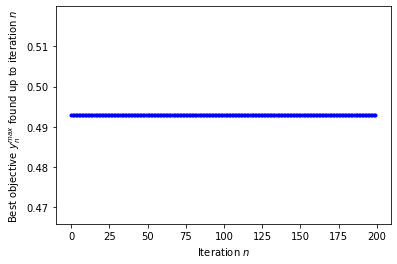

In [9]:
# plot best result vs iterations
cc.plot_best_objective()

/home/svedel/python_examples_test/venv/lib/python3.8/site-packages/creative_project/_plot.py:202: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale("log")


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Iteration $n$', ylabel='Relative improvement between iterations, $(y_n-y_{n-1})/y_n$'>)

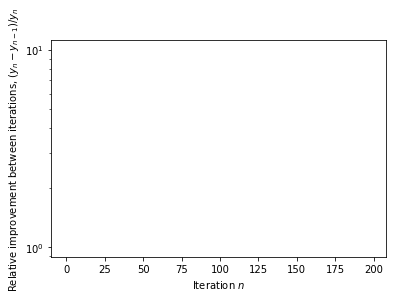

In [10]:
# plot convergence
cc.plot_convergence()

Let's also look at the sampled response values through the optimization

Text(0, 0.5, 'Brownie score obtained in iteration $n$')

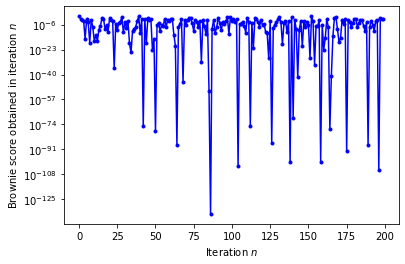

In [11]:
fx, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(np.arange(0,cc.y_data.shape[0]), cc.y_data["Response"], "-b.")
ax.set_yscale("log")
ax.set_xlabel("Iteration $n$")
ax.set_ylabel("Brownie score obtained in iteration $n$")